<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2'

In [5]:
os.listdir(base_path)

['data_add_delta_2_n250.csv',
 'data_add_delta_2_n120.csv',
 'data_add_delta_2_n60.csv',
 'data_add_delta_2_n30.csv',
 'data_add_delta_2_n20.csv']

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.146933,30.464262,63.358737,-38.869452,117.100479,156.551555,-39.451076
1,0.0,1.0,32.732393,48.490808,47.569674,63.678009,202.470884,134.336289,68.134595
2,0.0,2.0,67.308768,22.835690,55.093950,-3.386993,151.851415,155.304030,-3.452615
3,0.0,3.0,99.962705,21.924794,85.155544,-26.439265,190.603778,222.123305,-31.519527
4,0.0,4.0,81.438505,95.923656,87.908663,-2.539205,272.731620,270.771925,1.959695
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,63.299617,45.450837,24.195267,-29.864806,113.080916,141.799907,-28.718991
249996,999.0,246.0,32.180932,86.941312,23.847829,32.066916,185.036989,166.494222,18.542766
249997,999.0,247.0,88.863345,47.487124,83.999605,-28.424062,201.926012,233.850247,-31.924234
249998,999.0,248.0,49.438863,86.593616,29.058070,-56.531577,118.558971,187.618240,-69.059269


In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.146933,30.464262,63.358737,-38.869452,117.100479,156.551555,-39.451076
1,0.0,1.0,32.732393,48.490808,47.569674,63.678009,202.470884,134.336289,68.134595
2,0.0,2.0,67.308768,22.835690,55.093950,-3.386993,151.851415,155.304030,-3.452615
3,0.0,3.0,99.962705,21.924794,85.155544,-26.439265,190.603778,222.123305,-31.519527
4,0.0,4.0,81.438505,95.923656,87.908663,-2.539205,272.731620,270.771925,1.959695
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,63.299617,45.450837,24.195267,-29.864806,113.080916,141.799907,-28.718991
249996,999.0,246.0,32.180932,86.941312,23.847829,32.066916,185.036989,166.494222,18.542766
249997,999.0,247.0,88.863345,47.487124,83.999605,-28.424062,201.926012,233.850247,-31.924234
249998,999.0,248.0,49.438863,86.593616,29.058070,-56.531577,118.558971,187.618240,-69.059269


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    52.146933  30.464262  63.358737  -38.869452  117.100479   
      1.0    32.732393  48.490808  47.569674   63.678009  202.470884   
      2.0    67.308768  22.835690  55.093950   -3.386993  151.851415   
      3.0    99.962705  21.924794  85.155544  -26.439265  190.603778   
      4.0    81.438505  95.923656  87.908663   -2.539205  272.731620   
...                ...        ...        ...         ...         ...   
999.0 245.0  63.299617  45.450837  24.195267  -29.864806  113.080916   
      246.0  32.180932  86.941312  23.847829   32.066916  185.036989   
      247.0  88.863345  47.487124  83.999605  -28.424062  201.926012   
      248.0  49.438863  86.593616  29.058070  -56.531577  118.558971   
      249.0  32.496284  80.766930  34.688960  236.474623  394.426797   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    156.551555  -39.451076  
      1.0    134.336289   68.134595  
      2.0    155.304030   -3.452615  
      3.0    222.123305  -31.519527  
      4.0    270.771925    1.959695  
...                 ...         ...  
999.0 245.0  141.799907  -28.718991  
      246.0  166.494222   18.542766  
      247.0  233.850247  -31.924234  
      248.0  187.618240  -69.059269  
      249.0  170.765212  223.661585  

[250000 rows x 7 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    52.146933  30.464262  63.358737  -38.869452  117.100479   
      1.0    32.732393  48.490808  47.569674   63.678009  202.470884   
      2.0    67.308768  22.835690  55.093950   -3.386993  151.851415   
      3.0    99.962705  21.924794  85.155544  -26.439265  190.603778   
      4.0    81.438505  95.923656  87.908663   -2.539205  272.731620   
...                ...        ...        ...         ...         ...   
999.0 245.0  63.299617  45.450837  24.195267  -29.864806  113.080916   
      246.0  32.180932  86.941312  23.847829   32.066916  185.036989   
      247.0  88.863345  47.487124  83.999605  -28.424062  201.926012   
      248.0  49.438863  86.593616  29.058070  -56.531577  118.558971   
      249.0  32.496284  80.766930  34.688960  236.474623  394.426797   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    156.551555  -39.451076  
      1.0    134.336289   68.134595  
      2.0    155.304030   -3.452615  
      3.0    222.123305  -31.519527  
      4.0    270.771925    1.959695  
...                 ...         ...  
999.0 245.0  141.799907  -28.718991  
      246.0  166.494222   18.542766  
      247.0  233.850247  -31.924234  
      248.0  187.618240  -69.059269  
      249.0  170.765212  223.661585  

[250000 rows x 7 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.146933,30.464262,63.358737,-38.869452,117.100479,156.551555,-39.451076
1,0.0,1.0,32.732393,48.490808,47.569674,63.678009,202.470884,134.336289,68.134595
2,0.0,2.0,67.308768,22.835690,55.093950,-3.386993,151.851415,155.304030,-3.452615
3,0.0,3.0,99.962705,21.924794,85.155544,-26.439265,190.603778,222.123305,-31.519527
4,0.0,4.0,81.438505,95.923656,87.908663,-2.539205,272.731620,270.771925,1.959695
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,63.299617,45.450837,24.195267,-29.864806,113.080916,141.799907,-28.718991
249996,999.0,246.0,32.180932,86.941312,23.847829,32.066916,185.036989,166.494222,18.542766
249997,999.0,247.0,88.863345,47.487124,83.999605,-28.424062,201.926012,233.850247,-31.924234
249998,999.0,248.0,49.438863,86.593616,29.058070,-56.531577,118.558971,187.618240,-69.059269


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    52.146933  30.464262  63.358737  -38.869452  117.100479   
      1.0    32.732393  48.490808  47.569674   63.678009  202.470884   
      2.0    67.308768  22.835690  55.093950   -3.386993  151.851415   
      3.0    99.962705  21.924794  85.155544  -26.439265  190.603778   
      4.0    81.438505  95.923656  87.908663   -2.539205  272.731620   
...                ...        ...        ...         ...         ...   
999.0 245.0  63.299617  45.450837  24.195267  -29.864806  113.080916   
      246.0  32.180932  86.941312  23.847829   32.066916  185.036989   
      247.0  88.863345  47.487124  83.999605  -28.424062  201.926012   
      248.0  49.438863  86.593616  29.058070  -56.531577  118.558971   
      249.0  32.496284  80.766930  34.688960  236.474623  394.426797   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    156.551555  -39.451076  
      1.0    134.336289   68.134595  
      2.0    155.304030   -3.452615  
      3.0    222.123305  -31.519527  
      4.0    270.771925    1.959695  
...                 ...         ...  
999.0 245.0  141.799907  -28.718991  
      246.0  166.494222   18.542766  
      247.0  233.850247  -31.924234  
      248.0  187.618240  -69.059269  
      249.0  170.765212  223.661585  

[250000 rows x 7 columns]

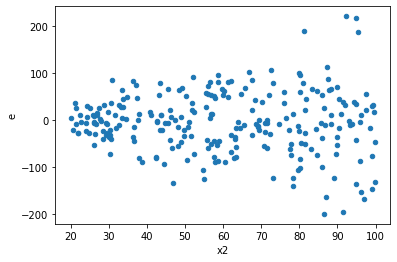

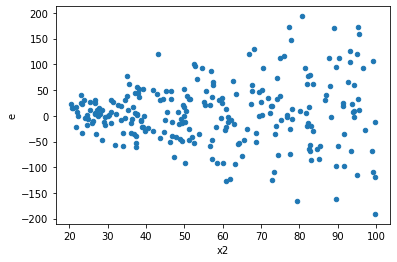

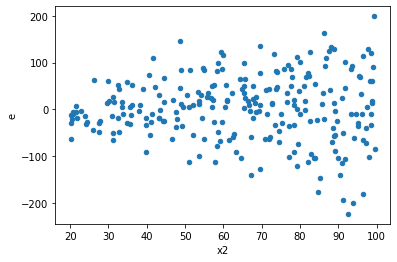

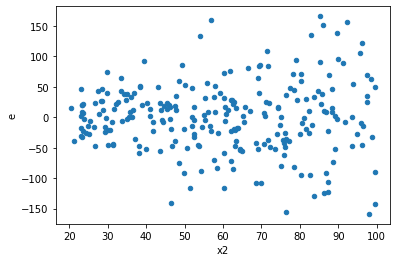

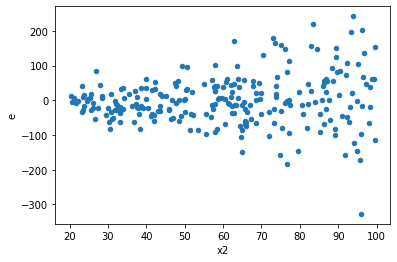

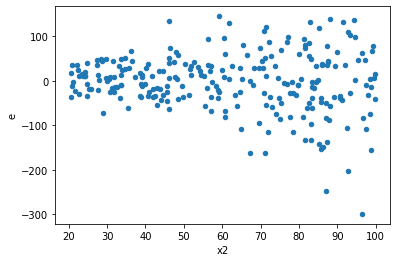

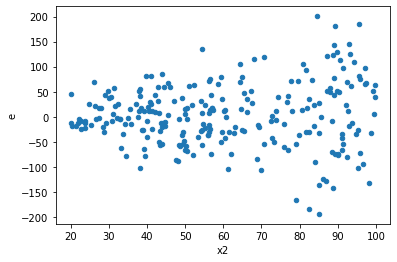

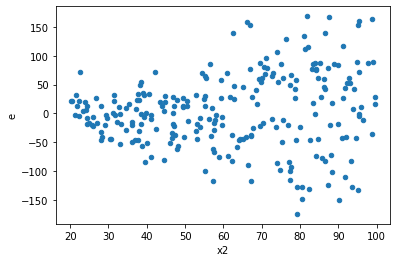

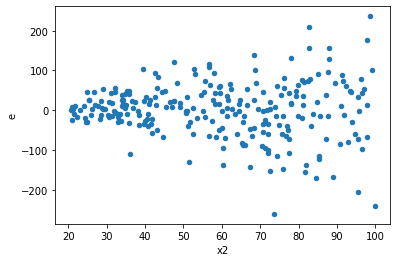

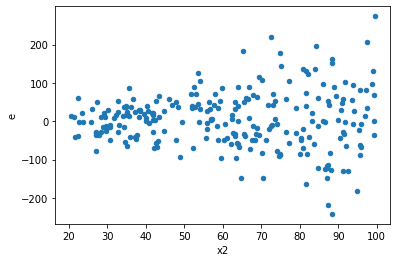

In [13]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,97.0,97.0,269653.8623773579,625527.8120419427,2779.9367255397724,6448.740330329307,2.319743565054407,4.610776769675695e-05,0.9999769461161516,2.3053883848378476e-05,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,193263.4402661011,541202.9317910047,1992.4066006814546,5579.411667948502,2.800337875833276,7.323548016913151e-07,0.9999996338225992,3.6617740084565753e-07,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,446245.5003493352,489276.4734907331,4600.469075766342,5044.0873555745675,1.0964289233341553,0.6512049302252565,0.6743975348873718,0.32560246511262825,Reject001=1 : Homoscedasticity
3.0,97.0,97.0,215891.09954878132,407285.9076107743,2225.68143864723,4198.823789801797,1.8865340371234094,0.001987009224062808,0.9990064953879686,0.000993504612031404,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,196814.86888797703,818444.9930684129,2029.0192668863613,8437.577248127967,4.15845102401412,1.64879221387082e-11,0.999999999991756,8.2439610693541e-12,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,201150.26673008836,608487.8742716667,2073.714090000911,6273.07086878007,3.0250413492524006,1.112531753388879e-07,0.9999999443734123,5.562658766944395e-08,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,183725.4190907154,587346.1840576044,1894.076485471293,6055.115299562932,3.1968694749178885,2.7096170196472258e-08,0.9999999864519149,1.3548085098236129e-08,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,192161.13778884496,596119.6293082807,1981.0426576169584,6145.563188745161,3.102186197311773,5.8820326387376554e-08,0.9999999705898368,2.9410163193688277e-08,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,291882.2897920658,626157.4503102767,3009.095771052225,6455.231446497698,2.1452396127094433,0.00021143185001526454,0.9998942840749924,0.00010571592500763227,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,269653.8623773579,625527.8120419427,2779.9367255397724,6448.740330329307,2.319743565054407,4.610776769675695e-05,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,193263.4402661011,541202.9317910047,1992.4066006814546,5579.411667948502,2.800337875833276,7.323548016913151e-07,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,446245.5003493352,489276.4734907331,4600.469075766342,5044.0873555745675,1.0964289233341553,0.6512049302252565,Reject001=1 : Homoscedasticity
3.0,97.0,97.0,215891.09954878132,407285.9076107743,2225.68143864723,4198.823789801797,1.8865340371234094,0.001987009224062808,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,196814.86888797703,818444.9930684129,2029.0192668863613,8437.577248127967,4.15845102401412,1.64879221387082e-11,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,201150.26673008836,608487.8742716667,2073.714090000911,6273.07086878007,3.0250413492524006,1.112531753388879e-07,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,183725.4190907154,587346.1840576044,1894.076485471293,6055.115299562932,3.1968694749178885,2.7096170196472258e-08,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,192161.13778884496,596119.6293082807,1981.0426576169584,6145.563188745161,3.102186197311773,5.8820326387376554e-08,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,291882.2897920658,626157.4503102767,3009.095771052225,6455.231446497698,2.1452396127094433,0.00021143185001526454,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    796
Reject001=1 : Homoscedasticity      204
Name: Result_test, dtype: int64